In [1]:
import random
import numpy as np
import scipy.integrate
from nbodyUtil import util
import matplotlib.pyplot as plt

## Reconstruction Function

In [2]:
def reconstructPhase(sv, tau, n, density=1):
    '''
    reconstructPhase()
        samples state vector 'sv' at delay tau, with dimension n
    '''
    state = []
    for _ in range(n): state.append([])
    
    for i in range(0, len(sv)-(n*tau), density):
        for dim in range(n):
            state[dim].append(sv[i+(dim*tau)])
            
    return state

# Forced, Damped, Harmonic Oscillator

We're going to treat our forced damped oscillator as an angular system (such as a pendulum) rather than linear displacement. 

We can adopt Taylor's notation, and write the equation of motion as

$$
\ddot{\phi} + 2\beta\dot{\phi} + \omega_0^2 sin \phi = \gamma \omega_0^2 cos(\omega t)
$$

We can linearize this by defining:
$$
x_1 = \phi \\
x_2 = \dot\phi \\
x_3 = t
$$
then define out system of equations as 
$$
\begin{cases} 
      \dot{x}_1 = \dot{\phi} \\
      \dot{x}_2 = \ddot{\phi} = \gamma \omega_0^2 cos(\omega x_3) - 2\beta x_2 - \omega_0^2sin(x_1) \\
      \dot{x}_3 = 1
   \end{cases}
$$

In [3]:
# define parameters
w0 = 1.5
B = 0.375
w = 1
#gamma = 1.0 # not chaotic
gamma = 1.1 # chaotic

def dx1(x1,x2,x3):
    return x2
def dx2(x1,x2,x3):
    return (gamma * w0**2)*np.cos(w*x3) - 2*B*x2 - w0**2 * np.sin(x1)
def dx3(x1,x2,x3):
    return 1
def derivatives(t,X):
    return [dx1(X[0],X[1],X[2]), dx2(X[0],X[1],X[2]), dx3(X[0],X[1],X[2])]

# integration parameters
T = 10000
y0 = [2,-0.5,0]
t = np.linspace(0,T,100*T)

# integrate
Y = scipy.integrate.odeint(derivatives, y0=y0, t=t, tfirst=True)

Text(0.5, 0.98, 'Forced, Damped, Harmonic Oscillator')

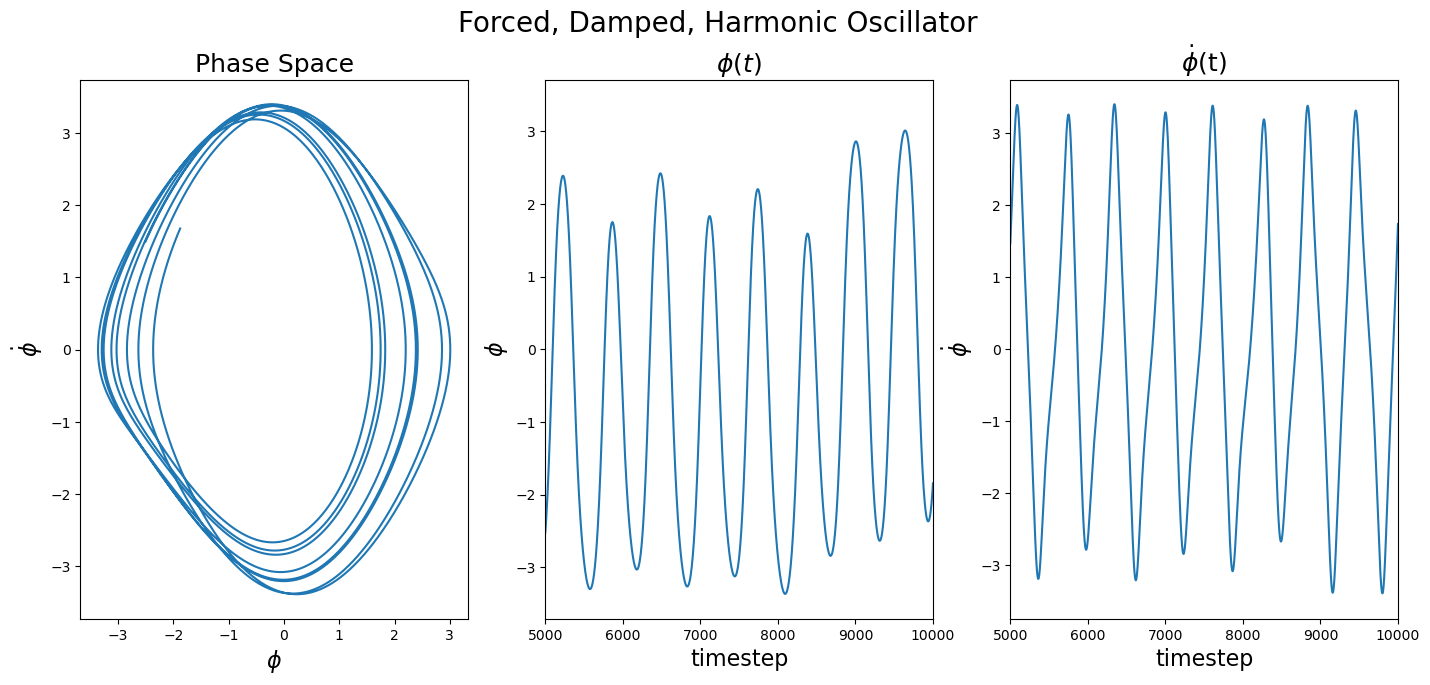

In [4]:
%matplotlib inline

# Let's check that we've got chaos
fig, axs = plt.subplots(1,3, figsize=(17,7))

x = Y[:,0]
xdot = Y[:,1]

t0=5000
t1=T

axs[0].plot(x[t0:t1],xdot[t0:t1])
axs[0].set_xlabel(r'$\phi$', fontsize=16)
axs[0].set_ylabel(r'$\dot{\phi}$', fontsize=16)
axs[0].set_title('Phase Space', fontsize=18)

axs[1].plot(x)
axs[1].set_xlim(t0,t1)
axs[1].set_xlabel('timestep', fontsize=16)
axs[1].set_ylabel(r'$\phi$', fontsize=16)
axs[1].set_title(r'$\phi(t)$', fontsize=18)

axs[2].plot(xdot)
axs[2].set_xlim(t0,t1)
axs[2].set_xlabel('timestep', fontsize=16)
axs[2].set_ylabel(r'$\dot{\phi}$', fontsize=16)
axs[2].set_title(r'$\dot{\phi}$(t)', fontsize=18)

plt.suptitle('Forced, Damped, Harmonic Oscillator', fontsize=20)

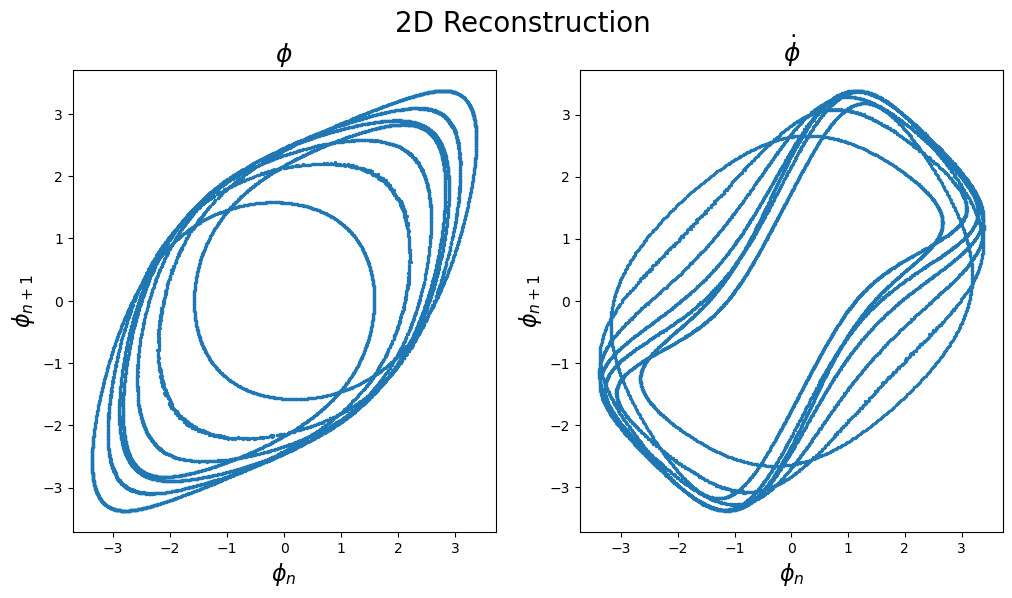

In [5]:
%matplotlib inline

tau = 100
n=3

# there's a lot of data here, let's throw some out for faster plotting
tp = 1000*100

sampleX = reconstructPhase(Y[tp:,0], tau, n, density=100)
sampleXdot = reconstructPhase(Y[tp:,1], tau, n, density=100)

fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].scatter(sampleX[0], sampleX[1], s=2)
axs[1].scatter(sampleXdot[0], sampleXdot[1], s=2)

plt.suptitle('2D Reconstruction', fontsize=20)

axs[0].set_xlabel(r'$\phi_n$', fontsize=16)
axs[0].set_ylabel(r'$\phi_{n+1}$', fontsize=16)
axs[0].set_title(r'$\phi$', fontsize=18)

axs[1].set_xlabel(r'$\phi_n$', fontsize=16)
axs[1].set_ylabel(r'$\phi_{n+1}$', fontsize=16)
axs[1].set_title(r'$\dot{\phi}$', fontsize=18);

Text(0.5, 0.92, '3D Reconstruction')

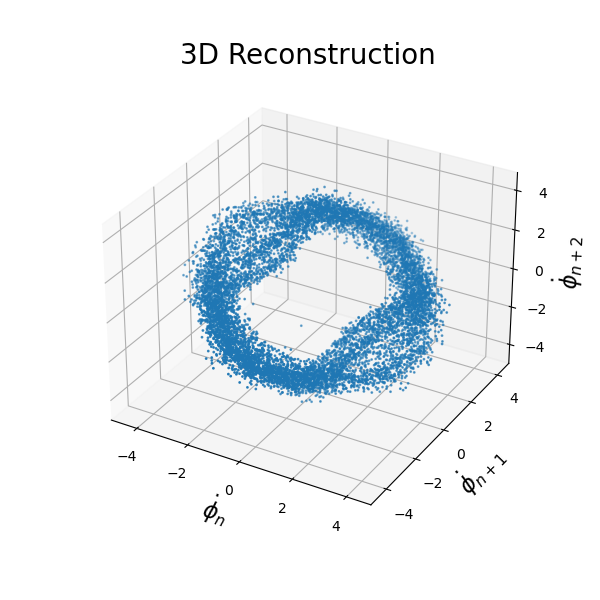

In [10]:
%matplotlib widget

# set this true to 3d scatter phi dot
xdot = True

data = sampleX
if xdot: data=sampleXdot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[0], data[1], data[2], s=1)

ax.set_xlabel(r'$\phi_n$', fontsize=16)
ax.set_ylabel(r'$\phi_{n+1}$', fontsize=16)
ax.set_zlabel(r'$\phi_{n+2}$', fontsize=16)

if xdot:
    ax.set_xlabel(r'$\dot{\phi}_n$', fontsize=16)
    ax.set_ylabel(r'$\dot{\phi}_{n+1}$', fontsize=16)
    ax.set_zlabel(r'$\dot{\phi}_{n+2}$', fontsize=16)

ax.set_title('3D Reconstruction', fontsize=20)

## Noisey Chaotic Attractor

If we have a real world system where the underlying math is unknown and we simply have a set of states, the states are certain to be noisey. However, phase space reconstruction still works

In [11]:
# define parameters
w0 = 1.5
B = 0.375
w = 1
gamma = 1.1

def dx1(x1,x2,x3):
    return x2
def dx2(x1,x2,x3):
    return (gamma * w0**2)*np.cos(w*x3) - 2*B*x2 - w0**2 * np.sin(x1)
def dx3(x1,x2,x3):
    return 1
def derivatives(t,X):
    return [dx1(X[0],X[1],X[2]), dx2(X[0],X[1],X[2]), dx3(X[0],X[1],X[2])]

# integration parameters
T = 10000
y0 = [2,-0.5,0]
t = np.linspace(0,T,100*T)

# integrate
Y = scipy.integrate.odeint(derivatives, y0=y0, t=t, tfirst=True)

In [12]:
# add noise
noise = np.random.normal(loc=1, scale=0.1, size=Y.size)
noise = noise.reshape(100*T,3)

Yn = Y*noise

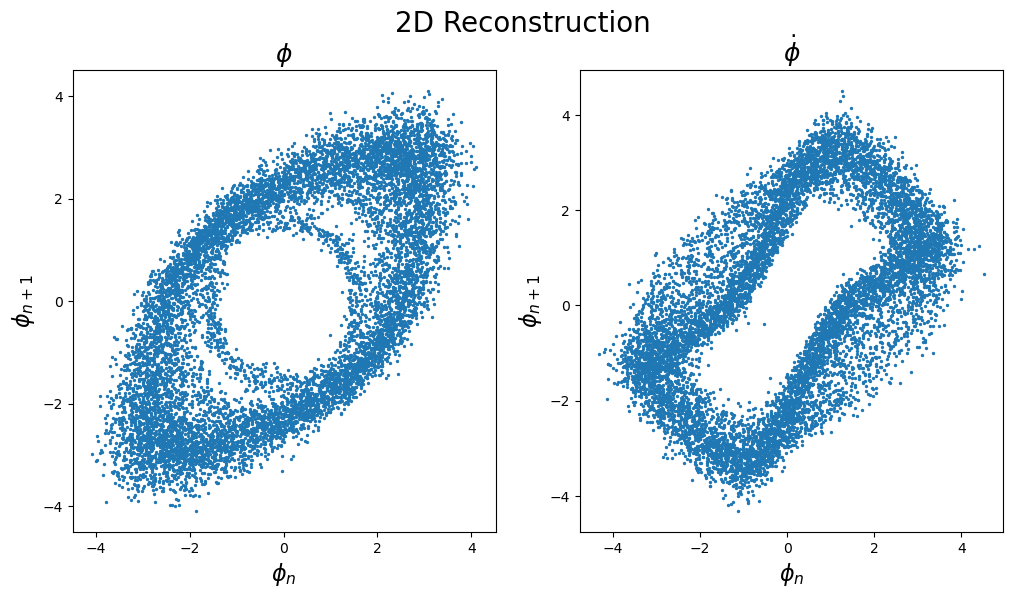

In [13]:
%matplotlib inline

tau = 100
n=3

sampleX = reconstructPhase(Yn[:,0], tau, n, 100)
sampleXdot = reconstructPhase(Yn[:,1], tau, n, 100)

fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].scatter(sampleX[0], sampleX[1], s=2)
axs[1].scatter(sampleXdot[0], sampleXdot[1], s=2)

plt.suptitle('2D Reconstruction', fontsize=20)

axs[0].set_xlabel(r'$\phi_n$', fontsize=16)
axs[0].set_ylabel(r'$\phi_{n+1}$', fontsize=16)
axs[0].set_title(r'$\phi$', fontsize=18)

axs[1].set_xlabel(r'$\phi_n$', fontsize=16)
axs[1].set_ylabel(r'$\phi_{n+1}$', fontsize=16)
axs[1].set_title(r'$\dot{\phi}$', fontsize=18);

Text(0.5, 0.92, '3D Reconstruction')

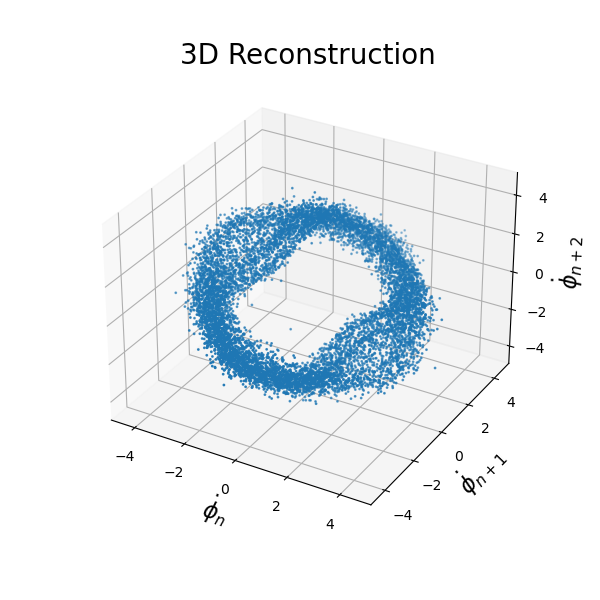

In [14]:
%matplotlib widget

# set this true to 3d scatter plot phi dot
xdot = True

data = sampleX
if xdot: data=sampleXdot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[0], data[1], data[2], s=1)

ax.set_xlabel(r'$\phi_n$', fontsize=16)
ax.set_ylabel(r'$\phi_{n+1}$', fontsize=16)
ax.set_zlabel(r'$\phi_{n+2}$', fontsize=16)

if xdot:
    ax.set_xlabel(r'$\dot{\phi}_n$', fontsize=16)
    ax.set_ylabel(r'$\dot{\phi}_{n+1}$', fontsize=16)
    ax.set_zlabel(r'$\dot{\phi}_{n+2}$', fontsize=16)

ax.set_title('3D Reconstruction', fontsize=20)

## A 'black box' system

What about a system where we don't know the math behind it? 

In [15]:
# most of this code is from a project I did for Phys115 computational physics
Ms, Y0 = util.getBin()

mp = 5e-6

xp  = 2.55
yp  = 0.0
vxp = 0.0
vyp = 1.0

Ms = Ms + [mp]
Y0 = Y0 + [xp,yp,vxp,vyp]

T = 50000
t = np.linspace(1,T,T*50)

Y1 = scipy.integrate.odeint(util.nbody, Y0, t, args=(Ms,))
# state vector follows form (x, y, vx, vy)

Ms, Y0 = util.getBin()
vyp = 1.11
Ms = Ms + [mp]
Y0 = Y0 + [xp,yp,vxp,vyp]

Y2 = scipy.integrate.odeint(util.nbody, Y0, t, args=(Ms,))

In [16]:
# add noise
noise = np.random.normal(loc=1, scale=0.05, size=Y1.size)
noise = noise.reshape(50*T,12)
Y1n = Y1*noise

noise = np.random.normal(loc=1, scale=0.05, size=Y2.size)
noise = noise.reshape(50*T,12)
Y2n = Y2*noise

Text(0.5, 1.0, '2D Reconstruction')

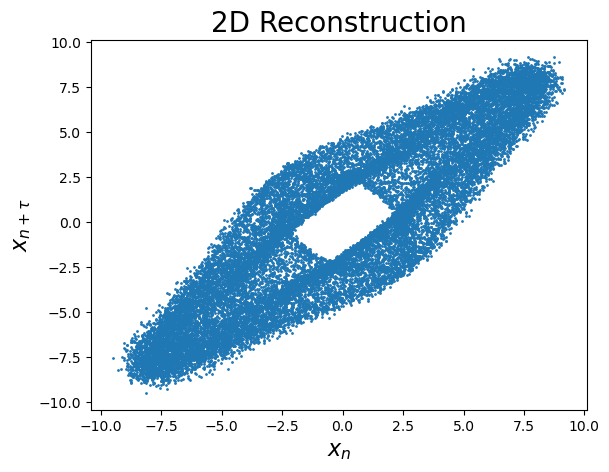

In [17]:
%matplotlib inline
# Let's reconstruct the phase
tau = 300
n = 3

x1 = Y1n[:,8]
x2 = Y2n[:,8]

x1p = reconstructPhase(x1, tau, n, 100)
x2p = reconstructPhase(x2, tau, n, 100)

data = x1p

plt.scatter(data[0], data[1], s=1)

plt.xlabel(r'$x_n$', fontsize=16)
plt.ylabel(r'$x_{n+\tau}$', fontsize=16)
plt.title('2D Reconstruction', fontsize=20)

Text(0.5, 0.92, '3D Reconstruction')

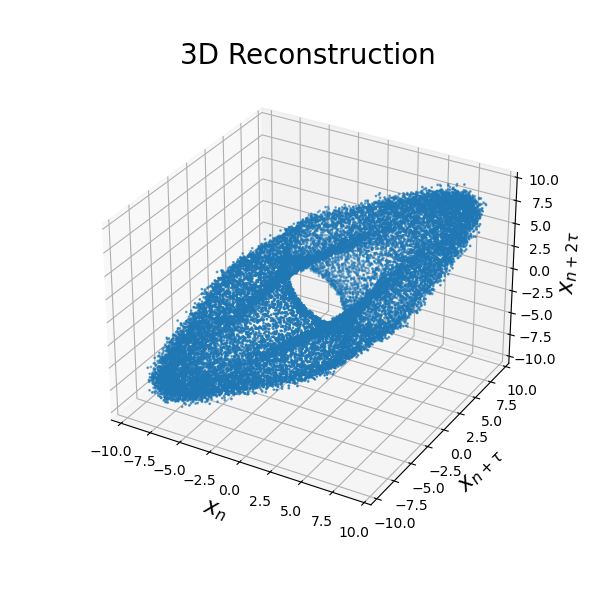

In [18]:
%matplotlib widget

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[0], data[1], data[2], s=1)

ax.set_xlabel(r'$x_n$', fontsize=16)
ax.set_ylabel(r'$x_{n+\tau}$', fontsize=16)
ax.set_zlabel(r'$x_{n+2\tau}$', fontsize=16)

ax.set_title('3D Reconstruction', fontsize=20)

Text(0, 0.5, 'y')

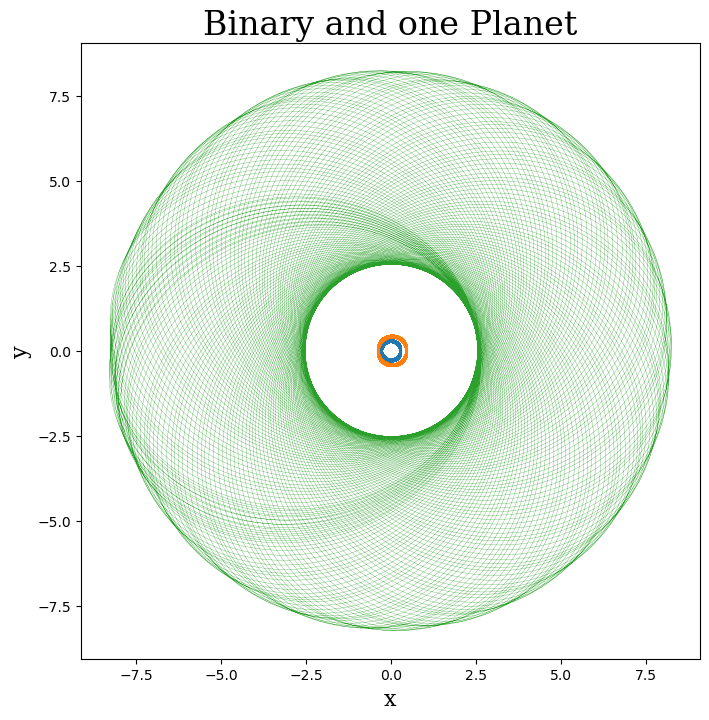

In [19]:
%matplotlib inline
k = 10000*50

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_aspect(1.0)

ax.scatter(Y1[:k,0],Y1[:k,1],s=0.1)
ax.scatter(Y1[:k,4],Y1[:k,5],s=0.1)
ax.plot(Y1[:k,8],Y1[:k,9],linewidth=0.2, c='tab:green')

# prettify
ax.set_title('Binary and one Planet', fontfamily='serif', fontsize=24)
ax.set_xlabel('x', fontfamily='serif', fontsize=16)
ax.set_ylabel('y', fontfamily='serif', fontsize=16)

This system was an n-body system with 2 large central bodies (ie stars) and one smaller, outer body (ie a planet). Setting initial condition `vyp = 1.1` results in an unbounded system, and therefore a non-chaotic system so the phase reconstruction for `Y2` does not indicate the presence of a chaotic attractor. See `example_nbody.ipynb` for an explanation of the nbody simulation.